In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('data.csv', encoding = "UTF-8")
data = pd.DataFrame(data)
holiday = pd.read_csv('holiday.csv', encoding = "UTF-8")
holiday = pd.DataFrame(holiday)

In [3]:
# 1.1 Find the time span of the order data

In [4]:
sort = data.sort_values('dt', ascending = True)
sort['dt'].reset_index()

,index,dt
0,751677,2019-01-20
1,993355,2019-01-20
2,799987,2019-01-20
3,501828,2019-01-20
4,360574,2019-01-20
...,...,...
2351850,2212868,2019-03-01
2351851,1920296,2019-03-01
2351852,1780867,2019-03-01
2351853,1685531,2019-03-01


In [5]:
print(data['dt'].min() + ' to ' + data['dt'].max())

2019-01-20 to 2019-03-01


In [6]:
# 1.2 Find the number of orders each day

In [7]:
data.groupby(['dt'])['dt'].count().reset_index(name = 'numbers')

,dt,numbers
0,2019-01-20,69859
1,2019-01-21,117686
2,2019-01-22,118409
3,2019-01-23,126331
4,2019-01-24,125764
5,2019-01-25,122092
6,2019-01-26,77779
7,2019-01-27,66399
8,2019-01-28,106025
9,2019-01-29,104704


In [8]:
# 2-a

In [9]:
number_of_order = data.groupby(['dt'])['dt'].count().reset_index(name = 'average_sales')

In [10]:
merge1 = pd.merge(holiday , number_of_order , on = 'dt')
#merge1
pd.DataFrame(merge1.groupby(['weekday'])['average_sales'].mean())

,average_sales
weekday,
1,62903.000000
2,62767.500000
3,64671.166667
4,63883.500000
5,62362.000000
6,42426.800000
7,40033.000000


In [11]:
# so we should choose different strategy between weekday and weekend

In [12]:
# 1.3 find the number of user

In [13]:
data1 = data.copy()
user = data1['member_id'].reset_index()
total_number = user.drop_duplicates('member_id').count(axis = 0)
numbers = total_number.values[0]
print('the total number of customers are' + str(numbers))

the total number of customers are466886


In [14]:
# 1.4 Find ten commodities with the highest sales

In [15]:
commodity = data.groupby('commodity_name')['commodity_name'].count()
commodity = pd.DataFrame(commodity)
commodity.columns = ['sales_number']
commodity = commodity.sort_values('sales_number', ascending = False)[:10]
commodity = commodity.reset_index()
commodity.index = pd.Series([i+1 for i in range(10)])
commodity

,commodity_name,sales_number
1,拿铁,425514
2,榛果拿铁,219627
3,澳瑞白,155506
4,标准美式,148666
5,香草拿铁,136841
6,卡布奇诺,115475
7,摩卡,113754
8,加浓美式,110526
9,焦糖玛奇朵,105081
10,焦糖拿铁,81120


In [16]:
# 4-a

<Figure size 720x360 with 0 Axes>

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text yticklabel objects>)

Text(0, 0.5, '销量')

Text(0.5, 0, '商品名称')

Text(0.5, 1.0, '销量前十商品')

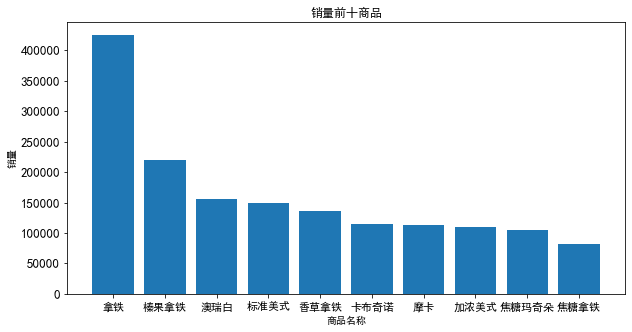

In [17]:
name = commodity['commodity_name']
number = commodity['sales_number']
plt.rcParams['font.sans-serif'] =['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (10 , 5))
plt.bar(name, number)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 13)
plt.ylabel('销量')
plt.xlabel('商品名称')
plt.title('销量前十商品')



In [18]:
# 1.5 Find the discount rate of each order and concat it onto the original dataset with column name discount_rate. 

In [19]:
#newDf = pd.DataFrame(data, columns=['pay_money', 'coffeestore_share_money', 'commodity_origin_money', 'commodity_income'])

In [20]:
data2 = data.copy()
data2 = data.assign(discount_rate = data['commodity_income']/data['commodity_origin_money'])
data2

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351850,2351850,9290477,2019-02-14,13622881441,97654670,SP079,意大利烤鸡卷(单卷),13.0,NaN,0.00,食品,健康轻食,8.58,8.58,0.0,0.66
2351851,2351851,9290478,2019-02-14,13622881441,97654670,SP008,拿铁,24.0,5676.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0,0.50
2351852,2351852,9290479,2019-02-13,13622881441,97654670,SP016,焦糖玛奇朵,27.0,8592.0,13.50,饮品,现磨咖啡,13.50,13.50,0.0,0.50
2351853,2351853,9290480,2019-02-12,13622881441,97654670,SP008,拿铁,24.0,8585.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0,0.50


In [21]:
# 1.6 Find the average discount of each week. One week should consist of Sunday to Saturday. 

In [22]:
merge2 = pd.merge(holiday , data2, on = 'dt')
#merge2
#I use the function merge to joint the holiday and data so that I can have a new label of weekend for each item in the Dataframe

In [23]:
discount = pd.DataFrame(merge2.groupby(['week_of_year'])['discount_rate'].mean())
discount.drop([3]+[9])
# delete the raw first one and last one because they are not a complete week

,discount_rate
week_of_year,
4,0.397794
5,0.419427
6,0.368075
7,0.489334
8,0.486613


In [24]:
# 1.7 Find the Retention Rate of any five days.

In [25]:
data5 = data.copy()
data5.insert(3, 'date', data5.pop('dt'))
data5 = pd.concat([data5,data['dt']], axis = 1)
#data5
counted = data5.pivot_table(index = 'member_id', columns = 'dt', values = 'date',aggfunc = 'count').fillna(0)
counted
# counted is a matrix whose index are member_id and columns are dates

dt,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,...,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01
member_id,,,,,,,,,,,,,,,,,,,,,
1520,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1533,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1557,0.0,0.0,1.0,0.0,20.0,0.0,0.0,3.0,0.0,4.0,...,0.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0
1574,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97978994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
Rentenion_rate_for_day = counted.applymap(lambda x:1 if x>0 else 0)
Rentenion_rate_for_day

my_list = ['2019-01-23', '2019-02-01', '2019-02-12', '2019-02-19', '2019-02-24']
pre_days = ['2019-01-22', '2019-01-31', '2019-02-11', '2019-02-18', '2019-02-23']
for i, item in enumerate(my_list):
    pre_item = pre_days[i]
    one = Rentenion_rate_for_day[(Rentenion_rate_for_day[item] == 1) & (Rentenion_rate_for_day[pre_item] == 1)]
    print('The Retention rate of %s is '%(item) + str(one[item].sum()/Rentenion_rate_for_day[pre_item].sum()) )

dt,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,...,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01
member_id,,,,,,,,,,,,,,,,,,,,,
1520,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1525,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1533,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1557,0,0,1,0,1,0,0,1,0,1,...,0,1,0,1,1,0,0,0,0,0
1574,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97978994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97979148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97979603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The Retention rate of 2019-01-23 is 0.23529411764705882
The Retention rate of 2019-02-01 is 0.1938650094344522
The Retention rate of 2019-02-12 is 0.23012662021428038
The Retention rate of 2019-02-19 is 0.27942580876208667
The Retention rate of 2019-02-24 is 0.16460001046408204


In [27]:
# 1.8 Find the Week Retention Rate of any day
# suppose to derive the week retention of 2019-02-16

In [28]:
week_retention =  counted[['2019-02-17','2019-02-18','2019-02-19','2019-02-20','2019-02-21','2019-02-22','2019-02-23']]
week_retention = week_retention.applymap(lambda x:1 if x>0 else 0)
week_retention['week_sum'] = week_retention.apply(lambda x: 1 if x.sum()>0 else 0, axis=1)
week_retention.head()
#week_retention[(week_retention > 0).values.tolist()].head()

dt,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,week_sum
member_id,,,,,,,,
1520,0,0,0,0,0,0,0,0
1525,0,0,0,0,0,0,0,0
1533,1,0,0,0,0,0,0,1
1557,0,0,1,0,1,0,1,1
1574,0,0,1,1,0,0,0,1


In [29]:
#retention rate on 2019-02-16
week_retention['2019-02-16'] = counted['2019-02-16'].apply(lambda x:1 if x>0 else 0)
week_retention

dt,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,week_sum,2019-02-16
member_id,,,,,,,,,
1520,0,0,0,0,0,0,0,0,0
1525,0,0,0,0,0,0,0,0,0
1533,1,0,0,0,0,0,0,1,1
1557,0,0,1,0,1,0,1,1,1
1574,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
97978994,0,0,0,0,0,0,0,0,0
97979148,0,1,0,0,0,0,0,1,0
97979603,0,0,0,0,0,0,0,0,0


In [30]:
filter_have_purchased = week_retention[(week_retention['2019-02-16'] == 1)]
print('The Week Retention rate of 2019-02-16 is ' + str(filter_have_purchased['week_sum'].sum()/filter_have_purchased['2019-02-16'].sum()))        

The Week Retention rate of 2019-02-16 is 0.6053532701746376


In [31]:
# 1.9 Find the Week Retention Rate of any day for new users , 
# which means finding users buying at that day for the first time and buying again within the next seven days.
# 查找新用户在任何一天的周保留率，这意味着查找首次在该天购买的用户，然后在接下来的7天内再次购买
# suppose to derive the week retention of 2019-01-25 for new users

In [32]:
pre_data = counted[[x for x in counted.columns if x < '2019-01-25']]
new_week_retention =  counted[['2019-01-26','2019-01-27','2019-01-28','2019-01-29','2019-01-30','2019-01-31','2019-02-01']]
new_week_retention

dt,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01
member_id,,,,,,,
1520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,0.0,0.0,2.0,0.0,1.0,0.0,0.0
1533,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1557,0.0,3.0,0.0,4.0,0.0,1.0,1.0
1574,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
97978994,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979148,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979603,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
new_week_retention = new_week_retention.applymap(lambda x:1 if x>0 else 0)
new_week_retention['week_sum'] = new_week_retention.apply(lambda x: 1 if x.sum()>0 else 0, axis=1)
new_week_retention['2019-01-25'] = counted['2019-01-25'].apply(lambda x:1 if x>0 else 0)
new_week_retention['pre_data'] = pre_data.apply(lambda x: 1 if x.sum()>0 else 0, axis=1)
new_week_retention

dt,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,week_sum,2019-01-25,pre_data
member_id,,,,,,,,,,
1520,0,0,0,0,0,0,0,0,1,1
1525,0,0,1,0,1,0,0,1,1,1
1533,0,0,0,1,0,0,0,1,0,1
1557,0,1,0,1,0,1,1,1,0,1
1574,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
97978994,0,0,0,0,0,0,0,0,0,0
97979148,0,0,0,0,0,0,0,0,0,0
97979603,0,0,0,0,0,0,0,0,0,0


In [34]:
# We need to find the users who do not have purchase before 2019-01-25 and 2019-01-25 is the first day of their purchased\
# I use first_time to denote the first time buyers in 2019-01-25
first_time = new_week_retention[(new_week_retention['2019-01-25'] == 1) & (new_week_retention['pre_data'] == 0)]
first_time
print('The Week Retention rate of 2019-01-25 for new users is ' + str(first_time['week_sum'].sum()/first_time['2019-01-25'].sum()))  

dt,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,week_sum,2019-01-25,pre_data
member_id,,,,,,,,,,
1682,1,0,0,0,0,1,1,1,1,0
2106,0,0,0,0,0,0,0,0,1,0
2781,1,0,0,0,0,0,0,1,1,0
4155,0,0,1,0,0,0,0,1,1,0
5503,0,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
94221100,0,0,0,0,0,0,0,0,1,0
94221121,0,0,0,0,0,0,0,0,1,0
94221555,0,0,0,0,0,0,0,0,1,0


The Week Retention rate of 2019-01-25 for new users is 0.33597845289466827


In [35]:
# 1.10 Find the Retention Rate WITHIN one week of new users.

In [36]:
# I choose the week "2019-01-26 to 2019-02-01"
new_users = new_week_retention[(new_week_retention['week_sum'] == 1) & (new_week_retention['pre_data'] == 0)]
del(new_users['week_sum'])
del(new_users['2019-01-25'])
del(new_users['pre_data'])
not_once =  new_users.apply(lambda x: 1 if x.sum()>1 else 0, axis=1)
new_users

dt,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01
member_id,,,,,,,
1660,0,0,0,0,1,0,0
1682,1,0,0,0,0,1,1
1712,0,0,1,0,0,0,0
1736,0,0,0,0,0,1,0
1869,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
96917150,0,0,0,0,0,0,1
96918326,0,0,0,0,0,0,1
96918739,0,0,0,0,0,0,1


In [37]:
not_once

member_id
1660        0
1682        1
1712        0
1736        0
1869        0
           ..
96917150    0
96918326    0
96918739    0
96920132    0
96920202    0
Length: 157649, dtype: int64

In [38]:
print('the Retention Rate WITHIN (2019-01-26 to 2019-02-01)of new users is ' + str(not_once.sum()/not_once.count()))  

the Retention Rate WITHIN (2019-01-26 to 2019-02-01)of new users is 0.1843525807331477


In [39]:
# 1.11 Find “Active Users”

In [40]:
data

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351850,2351850,9290477,2019-02-14,13622881441,97654670,SP079,意大利烤鸡卷(单卷),13.0,NaN,0.00,食品,健康轻食,8.58,8.58,0.0
2351851,2351851,9290478,2019-02-14,13622881441,97654670,SP008,拿铁,24.0,5676.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0
2351852,2351852,9290479,2019-02-13,13622881441,97654670,SP016,焦糖玛奇朵,27.0,8592.0,13.50,饮品,现磨咖啡,13.50,13.50,0.0
2351853,2351853,9290480,2019-02-12,13622881441,97654670,SP008,拿铁,24.0,8585.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0


In [41]:
user_count = data.groupby(['member_id'])['member_id'].count()
user_count = pd.DataFrame(user_count)
user_count.columns = ['buy_number']
activate_users = user_count[(user_count['buy_number']>=5)]
activate_users

,buy_number
member_id,
1525,7
1533,12
1557,50
1574,24
1575,139
...,...
97945667,8
97946290,6
97946934,7


In [42]:
# 1.12 Write the table you get in 11 as a csv file with filename ActiveUser.csv.

In [43]:
activate_users.to_csv("ActiveUser.csv")

In [44]:
# 1.13 Provide a description of the number of orders for each active user 

In [45]:
number = activate_users['buy_number'].count()
mean = activate_users['buy_number'].mean()
the_max = activate_users['buy_number'].max()
the_min = activate_users['buy_number'].min()
print("Total_number：%d, Mean_of_Activate_users：%f, Range_of_Activate_users：from %d to %d"%(number, mean, the_min, the_max))

Total_number：166308, Mean_of_Activate_users：10.418188, Range_of_Activate_users：from 5 to 585


In [46]:
# 1.13 (a) Find the std, variance, skewness and kurtosis. 

In [47]:
std = activate_users['buy_number'].std()
stddev = std * std
skew = activate_users['buy_number'].skew()
kurt = activate_users['buy_number'].kurt()
print("Std：%f, Varience：%f, Skewness：%f，Kurtosis：%f"%(std, stddev, skew, kurt))

Std：7.599244, Varience：57.748512, Skewness：6.542469，Kurtosis：241.357987


In [48]:
# 2.1 Remove the first column of the data in data.csv , because it is just a copy of index. 

In [90]:
data2.drop(columns = ['Unnamed: 0'], inplace = True)
data2.columns

Index(['Unnamed: 0.1', 'dt', 'phone_no', 'member_id', 'commodity_code',
       'commodity_name', 'commodity_origin_money', 'coupon_id', 'coupon_money',
       'one_category_name', 'two_category_name', 'commodity_income',
       'pay_money', 'coffeestore_share_money', 'discount_rate'],
      dtype='object')

In [49]:
del(data['Unnamed: 0'])
del(data['Unnamed: 0.1'])
data

,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money
0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0
1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0
2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0
3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0
4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351850,2019-02-14,13622881441,97654670,SP079,意大利烤鸡卷(单卷),13.0,NaN,0.00,食品,健康轻食,8.58,8.58,0.0
2351851,2019-02-14,13622881441,97654670,SP008,拿铁,24.0,5676.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0
2351852,2019-02-13,13622881441,97654670,SP016,焦糖玛奇朵,27.0,8592.0,13.50,饮品,现磨咖啡,13.50,13.50,0.0
2351853,2019-02-12,13622881441,97654670,SP008,拿铁,24.0,8585.0,12.00,饮品,现磨咖啡,12.00,12.00,0.0


In [50]:
# 2.2 Try to construct user-item table. An example of user-item pair: (Phone_No, 标准美式) 

In [51]:
table = pd.pivot_table(data, index = 'phone_no', columns = 'commodity_name', aggfunc = np.sum, fill_value = 0)
table

coffeestore_share_money                                \
commodity_name                 NFC鲜榨橙汁 NFC鲜榨芒果汁 NFC鲜榨芒果混合果汁 NFC鲜榨荔枝汁   
phone_no                                                               
51379898                           0.0      0.0         0.0      0.0   
57047978                           0.0      0.0         0.0      0.0   
61120518                           0.0      0.0         0.0      0.0   
62288158                           0.0      0.0         0.0      0.0   
64618166                           0.0      0.0         0.0      0.0   
...                                ...      ...         ...      ...   
19997912482                        0.0      0.0         0.0      0.0   
19999208056                        0.0      0.0         0.0      0.0   
19999597999                        0.0      0.0         0.0      0.0   
33757911877                        0.0      0.0         0.0      0.0   
85293820835                        0.0      0.0         0.0      0.0   

                                                                  ...  \
commodity_name NFC鲜榨蓝莓草莓混合果汁 依云矿泉水330ml 加浓美式 卡布奇诺 卡布奇诺瑞纳冰 土豆烧牛方饭  ...   
phone_no                                                          ...   
51379898                 0.0        0.0  0.0  0.0     0.0      0  ...   
57047978                 0.0        0.0  0.0  0.0     0.0      0  ...   
61120518                 0.0        0.0  0.0  0.0     0.0      0  ...   
62288158                 0.0        0.0  0.0  0.0     0.0      0  ...   
64618166                 0.0        0.0  0.0  0.0     0.0      0  ...   
...                      ...        ...  ...  ...     ...    ...  ...   
19997912482              0.0        0.0  0.0  0.0     0.0      0  ...   
19999208056              0.0        0.0  0.0  0.0     0.0      0  ...   
19999597999              0.0        0.0  0.0  0.0     0.0      0  ...   
33757911877              0.0        0.0  0.0  0.0     0.0      0  ...   
85293820835              0.0        0.0  0.0  0.0     0.0      0  ...   

               pay_money                                                    \
commodity_name     蜜汁叉烧包 金枪鱼谷物沙拉 陈皮普洱 香椰提子麦芬  香草拿铁 香蕉核桃麦芬 鱼香茄子饭 鸡蛋马铃薯双拼三明治   
phone_no                                                                     
51379898               0     0.0    0    0.0   0.0    0.0   0.0        0.0   
57047978               0     0.0    0    0.0   0.0    0.0   0.0        0.0   
61120518               0     0.0    0    0.0   0.0    0.0   0.0        0.0   
62288158               0     0.0    0    0.0   0.0    0.0   0.0        0.0   
64618166               0     0.0    0    0.0   0.0    0.0   0.0        0.0   
...                  ...     ...  ...    ...   ...    ...   ...        ...   
19997912482            0     0.0    0    0.0   0.0    0.0   0.0        0.0   
19999208056            0     0.0    0    0.0   0.0    0.0   0.0        0.0   
19999597999            0     0.0    0    0.0  27.0    0.0   0.0        0.0   
33757911877            0     0.0    0    0.0   0.0    0.0   0.0        0.0   
85293820835            0     0.0    0    0.0   0.0    0.0   0.0        0.0   

                             
commodity_name 黑森林蛋糕 黑金气泡美式  
phone_no                     
51379898         0.0    0.0  
57047978         0.0    0.0  
61120518         0.0    0.0  
62288158         0.0    0.0  
64618166         0.0    0.0  
...              ...    ...  
19997912482      0.0    0.0  
19999208056      0.0    0.0  
19999597999     29.0    0.0  
33757911877      0.0    0.0  
85293820835      0.0    0.0  

[466886 rows x 511 columns]

In [52]:
# 2.3 Try to construct a dataset to show this past purchasing behavior trend. 
# a.两天对应一个维度。
# b.数据时间跨度的最后两天应该是Future，这意味着它对应于以下数据挖掘模型的目标字段。
# c.每个用户向量的长度必须最大化。
# d.数据集应该是Pandas中的DataFrame，因此您可以根据需要自定义列。
# 例如，如果时间跨度是从2019-02-01到2019-02-10，则总共有10天。因此，每个用户对应一个具有4个特征和1个目标维度的5维向量。向量[ 4，0，0，0，1 ]表示该用户在02-09和02-10之间购买了一件商品，在02-01和02-02之间购买了四种商品。此外，由于规则3，每个用户向量的长度必须为5。

In [53]:
counted

dt,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,...,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01
member_id,,,,,,,,,,,,,,,,,,,,,
1520,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1533,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1557,0.0,0.0,1.0,0.0,20.0,0.0,0.0,3.0,0.0,4.0,...,0.0,1.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0
1574,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97978994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
new_counted = counted['2019-01-20'] + counted['2019-01-21']
new_counted = pd.DataFrame(new_counted)
new_counted.columns = ['time_0']
for i, t in enumerate(counted.columns):
    if i == 0 or i == 1:
        continue
    if t >= '2019-02-27':
        break
    if i % 2 == 0:
        temp = i/2
        new_counted['time_%s'%(temp)] = counted[t]
    else:
        temp = (i-1)/2
        new_counted['time_%s'%(temp)] += counted[t]

print(t,i)
new_counted['target'] = counted['2019-02-27'] + counted['2019-02-28']
new_counted

2019-02-27 38


,time_0,time_1.0,time_2.0,time_3.0,time_4.0,time_5.0,time_6.0,time_7.0,time_8.0,time_9.0,time_10.0,time_11.0,time_12.0,time_13.0,time_14.0,time_15.0,time_16.0,time_17.0,time_18.0,target
member_id,,,,,,,,,,,,,,,,,,,,
1520,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1525,2.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1533,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0
1557,0.0,1.0,20.0,3.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,1.0,11.0,0.0,0.0
1574,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97978994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97979148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
97979603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# 3.1 Transform the data you got from the last section into an array in Numpy.

In [56]:
dataset = np.array(new_counted)
dataset

array([[0., 2., 2., ..., 0., 0., 0.],
       [2., 0., 1., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# 3.2 Split the data into features X and targets Y.

In [58]:
print(len(dataset), len(dataset[0]))
x = dataset[:,0:19]
y = dataset[:,-1]
y = np.array([1 if x > 0 else 0 for x in list(y)])
y

466886 20


array([0, 0, 1, ..., 0, 0, 0])

In [59]:
print(x.shape, y.shape)

(466886, 19) (466886,)


In [60]:
#从3.3 用中文是因为不知道怎么翻译(sorry...)
# 3.3 使用Sklearn中的Adaboost（随机森林）构建具有3倍交叉验证的预测模型。

In [61]:
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
#bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), algorithm="SAMME", n_estimators=200)

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
bdt = AdaBoostClassifier(clf, algorithm="SAMME", n_estimators=200)

In [63]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(bdt, x, y, cv=3)

In [64]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.3234841450539946

In [65]:
from sklearn.metrics import *
#confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94    413154
           1       0.51      0.24      0.32     53732

    accuracy                           0.89    466886
   macro avg       0.71      0.60      0.63    466886
weighted avg       0.86      0.89      0.87    466886



In [66]:
# 3.3b  不用SVM或贝叶斯分类器的原因
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = cross_val_predict(gnb, x, y, cv=3)
f1_score(y, y_pred_gnb)

0.3424706825207308

In [67]:
print(classification_report(y, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90    413154
           1       0.31      0.39      0.34     53732

    accuracy                           0.83    466886
   macro avg       0.61      0.64      0.62    466886
weighted avg       0.85      0.83      0.84    466886



In [69]:
# SVM代码，但是由于样本数目太大，时间复杂度太高，无法短时间内运行出来
#from sklearn import svm
#clf = svm.SVC()
#clf.fit(x, y)
#y_pred_clf = clf.predict(x)
# print(classification_report(y, y_pred_clf))


In [70]:
"""
比较两个混淆矩阵可知，在准确度方面，随机森林能够达到0.89的准确度，但是贝叶斯分类器只能达到0.83
"""

'\n比较两个困惑度矩阵可知，在准确度方面，随机森林能够达到0.89的准确度，但是贝叶斯分类器只能达到0.83\n'

In [71]:
"""
首先，svm适用于小数据集
对于svm模型来说，这次的输入参数达到（466886*20），其模型生成的支持向量所需的时间复杂度太高，无法运行
典型的时间复杂度在O(Nsv^3+LNsv^2+dLNsv)和O(dL^2)之间，
其中Nsv是支持向量的个数，L是训练集样本的个数，d是每个样本的维数。
这么高的时间复杂度，对于大数据集来说，cpu完全无法在短时间内运行出来
"""

'\n首先，svm适用于小数据集\n对于svm模型来说，这次的输入参数达到（466886*20），其模型生成的支持向量所需的时间复杂度太高，无法运行\n典型的时间复杂度在O(Nsv^3+LNsv^2+dLNsv)和O(dL^2)之间，\n其中Nsv是支持向量的个数，L是训练集样本的个数，d是每个样本的维数。\n这么高的时间复杂度，对于大数据集来说，cpu完全无法在短时间内运行出来\n'

In [91]:
"""
为了能够运行svm模型，在之后分别抽样200， 2000， 20000个进行了svm的训练
可以看出抽样200， 2000时的效果不尽人意
在抽样2万时，能取得较好的效果
注：在2万样本训练时，极其消耗时间
"""

'\n为了能够运行svm模型，在之后分别抽样200， 2000， 20000个进行了svm的训练\n可以看出抽样200， 2000时的效果不尽人意\n在抽样2万时，能取得较好的效果\n注：在2万样本训练时，极其消耗时间\n'

In [73]:
# 3.4 调整模型并报告可以为模型获得的最佳度量以及相应的混淆矩阵和模型名称。

In [74]:
# 3.4 a 尝试进行过采样或欠采样。

In [75]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_sample(x, y)

In [76]:
bdt = AdaBoostClassifier(RandomForestClassifier(max_depth=1), algorithm="SAMME", n_estimators=50)
y_pred_under = cross_val_predict(bdt, x_resampled, y_resampled, cv=3)
print(classification_report(y_resampled, y_pred_under))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     53732
           1       0.77      0.66      0.71     53732

    accuracy                           0.73    107464
   macro avg       0.74      0.73      0.73    107464
weighted avg       0.74      0.73      0.73    107464



In [77]:
# 3.4 b 修改模型参数

In [78]:
bdt2 = AdaBoostClassifier(RandomForestClassifier(max_depth=1), algorithm="SAMME", n_estimators=300)
y_pred = cross_val_predict(bdt2, x_resampled, y_resampled, cv=3)
print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     53732
           1       0.78      0.64      0.70     53732

    accuracy                           0.73    107464
   macro avg       0.74      0.73      0.73    107464
weighted avg       0.74      0.73      0.73    107464



In [79]:
from sklearn import svm
clf = svm.SVC()
a = np.concatenate((x_resampled[0:100],x_resampled[-100:-1]), axis=0)
b = np.append(y_resampled[0:100],y_resampled[-100:-1])
clf.fit(a, b)
y_pred_clf = clf.predict(x)
print(classification_report(y, y_pred_clf))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91    413154
           1       0.12      0.07      0.08     53732

    accuracy                           0.84    466886
   macro avg       0.50      0.50      0.50    466886
weighted avg       0.80      0.84      0.81    466886



In [80]:
a = np.concatenate((x_resampled[0:1000],x_resampled[-1000:-1]), axis=0)
b = np.append(y_resampled[0:1000],y_resampled[-1000:-1])
clf.fit(a, b)
y_pred_clf = clf.predict(x)
print(classification_report(y, y_pred_clf))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       0.88      0.66      0.76    413154
           1       0.11      0.31      0.16     53732

    accuracy                           0.62    466886
   macro avg       0.49      0.49      0.46    466886
weighted avg       0.79      0.62      0.69    466886



In [81]:
a = np.concatenate((x_resampled[0:10000],x_resampled[-10000:-1]), axis=0)
b = np.append(y_resampled[0:10000],y_resampled[-10000:-1])
clf.fit(a, b)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
y_pred_clf = clf.predict(x_resampled)
print(classification_report(y_resampled, y_pred_clf))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     53732
           1       0.74      0.72      0.73     53732

    accuracy                           0.73    107464
   macro avg       0.73      0.73      0.73    107464
weighted avg       0.73      0.73      0.73    107464



In [83]:
print(f1_score(y_resampled, y_pred_clf))  # 2万样本的svm

0.7295304617772603


In [84]:
# 3.4 c F1度量
print(f1_score(y_resampled, y_pred_under)) # 10万样本，50节点的adaboost
print(f1_score(y_resampled, y_pred))       # 10万样本，300节点的adaboost

0.7124122719069581
0.7029927464116795


In [85]:
# 3.5 调整后，尝试解释为什么模型效果更好

In [86]:
"""
采用欠采样的方式，虽然减少了训练数据，但是很好的平衡了正负样本数，便于模型更好地学习需要地特征。
采用更多的分类树,模型的判断结构更为复杂，提升了集成的模型的数量，易于拟合出更好的结果

"""

'\n采用欠采样的方式，虽然减少了训练数据，但是很好的平衡了正负样本数，便于模型更好地学习需要地特征。\n采用更多的分类树,模型的判断结构更为复杂，提升了集成的模型的数量，易于拟合出更好的结果\n\n'

In [87]:
"""
svm并不使用于大的数据集，因为其时间复杂度太高了，
但是如果只使用小部分样本进行训练，可以发现结果意外的还不错
"""

'\nsvm并不使用于大的数据集，因为其时间复杂度太高了，\n但是如果只使用小部分样本进行训练，可以发现结果意外的还不错\n'